In [1]:
# Bloco 1: Instalação e Importação de Bibliotecas
!pip install numpy matplotlib scikit-learn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

print("Bibliotecas instaladas e importadas com sucesso!")

Bibliotecas instaladas e importadas com sucesso!


In [2]:
# Bloco 2: Preparação dos Dados
dados_jogo = [
    ['sol',    85, 85, 'não',  'não joga'],
    ['sol',    80, 90, 'sim',  'não joga'],
    ['nublado',83, 78, 'não',  'joga'],
    ['chuva',  70, 96, 'não',  'joga'],
    ['chuva',  68, 80, 'não',  'joga'],
    ['chuva',  65, 70, 'sim',  'não joga'],
    ['nublado',64, 65, 'sim',  'joga'],
    ['sol',    72, 95, 'não',  'não joga'],
    ['sol',    69, 70, 'não',  'joga'],
    ['chuva',  75, 80, 'não',  'joga'],
    ['sol',    75, 70, 'sim',  'joga'],
    ['nublado',72, 90, 'sim',  'joga'],
    ['nublado',81, 75, 'não',  'joga'],
    ['chuva',  71, 80, 'sim',  'não joga']
]

# Separando features (X) e target (Y)
X = np.array([linha[:4] for linha in dados_jogo])
Y = np.array([linha[4] for linha in dados_jogo])

print("Dados originais extraídos com sucesso!")
print("\nExemplo de features (X):", X[0])
print("Exemplo de target (Y):", Y[0])

Dados originais extraídos com sucesso!

Exemplo de features (X): ['sol' '85' '85' 'não']
Exemplo de target (Y): não joga


In [3]:
# Bloco 3: Pré-processamento dos Dados
# Convertendo colunas categóricas para numéricas
le_ceu = LabelEncoder()
le_vento = LabelEncoder()

X[:, 0] = le_ceu.fit_transform(X[:, 0])  # Céu
X[:, 3] = le_vento.fit_transform(X[:, 3])  # Vento

# Convertendo para DataFrame
XX = pd.DataFrame(X, columns=['Céu', 'Temperatura', 'Umidade', 'Vento'])
YY = pd.DataFrame(Y, columns=['Classe'])

# Convertendo strings numéricas para float
XX['Temperatura'] = XX['Temperatura'].astype(float)
XX['Umidade'] = XX['Umidade'].astype(float)

print("\nDados após conversão:")
print(XX.head())
print("\nClasses:")
print(YY.head())

# Mapeamentos para referência
print("\nMapeamento Céu:", dict(zip(le_ceu.classes_, le_ceu.transform(le_ceu.classes_))))
print("Mapeamento Vento:", dict(zip(le_vento.classes_, le_vento.transform(le_vento.classes_))))


Dados após conversão:
  Céu  Temperatura  Umidade Vento
0   2         85.0     85.0     0
1   2         80.0     90.0     1
2   1         83.0     78.0     0
3   0         70.0     96.0     0
4   0         68.0     80.0     0

Classes:
     Classe
0  não joga
1  não joga
2      joga
3      joga
4      joga

Mapeamento Céu: {np.str_('chuva'): np.int64(0), np.str_('nublado'): np.int64(1), np.str_('sol'): np.int64(2)}
Mapeamento Vento: {np.str_('não'): np.int64(0), np.str_('sim'): np.int64(1)}


In [4]:
# Bloco 4: Criação e Treinamento da Árvore de Decisão
arvore_jogo = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
arvore_jogo = arvore_jogo.fit(XX, YY)

print("Árvore de decisão treinada com sucesso!")
print("\nImportância das features:", arvore_jogo.feature_importances_)
print("Classes:", arvore_jogo.classes_)
print("Acurácia no treino:", arvore_jogo.score(XX, YY))

Árvore de decisão treinada com sucesso!

Importância das features: [0.34788805 0.20048415 0.27045573 0.18117207]
Classes: ['joga' 'não joga']
Acurácia no treino: 0.8571428571428571


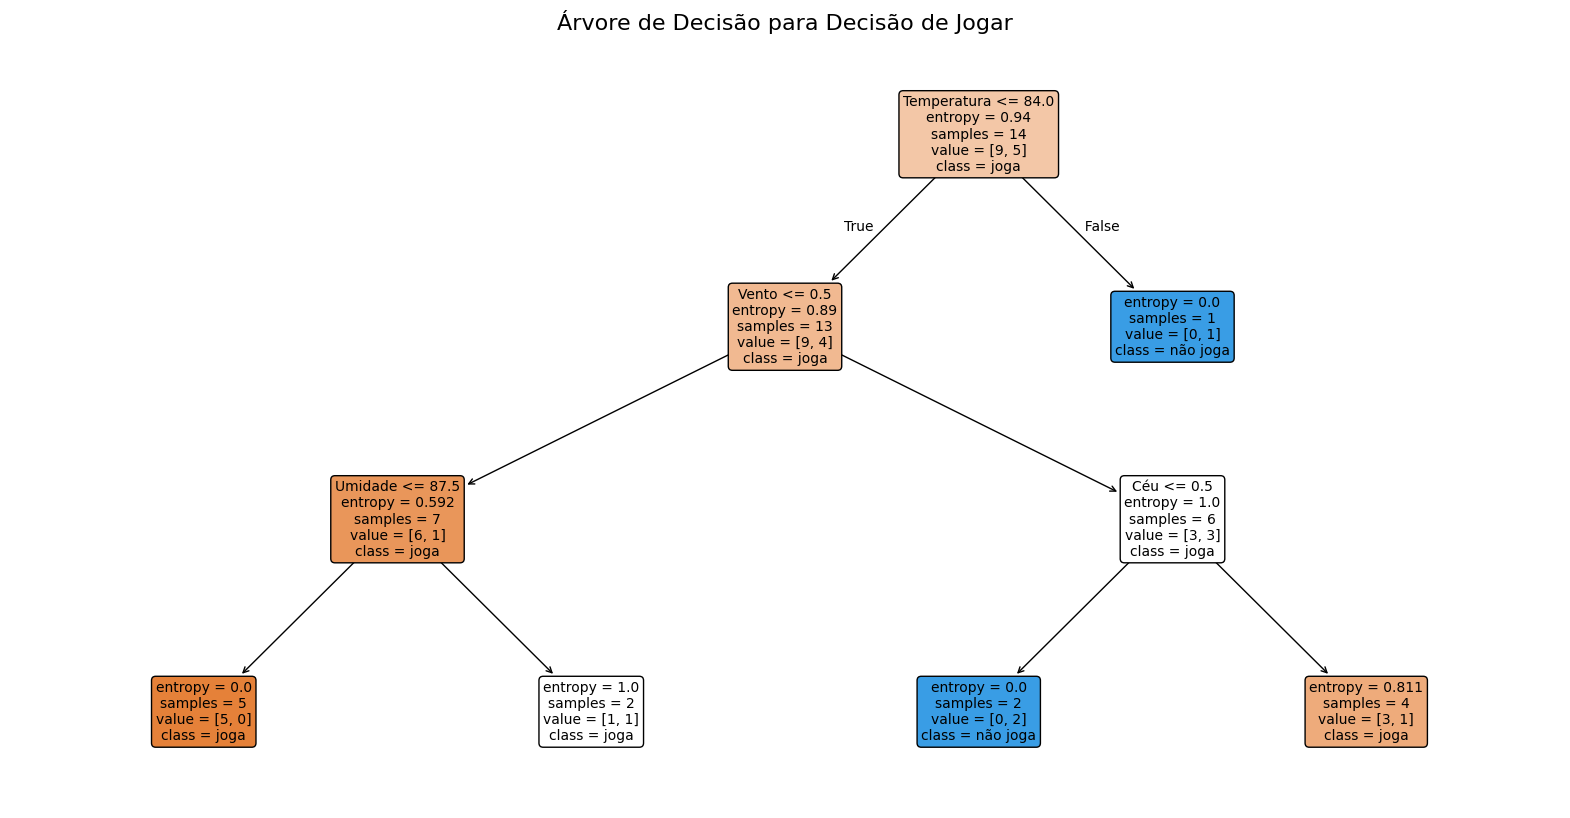

In [5]:
# Bloco 5: Visualização da Árvore de Decisão
plt.figure(figsize=(20,10))
previsores = ['Céu', 'Temperatura', 'Umidade', 'Vento']
plot_tree(arvore_jogo,
          feature_names=previsores,
          class_names=arvore_jogo.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árvore de Decisão para Decisão de Jogar", fontsize=16)
plt.show()

In [6]:
# Bloco 6: Extração das Regras de Decisão
r = export_text(arvore_jogo, feature_names=previsores)
print("\nRegras da Árvore de Decisão:\n")
print(r)


Regras da Árvore de Decisão:

|--- Temperatura <= 84.00
|   |--- Vento <= 0.50
|   |   |--- Umidade <= 87.50
|   |   |   |--- class: joga
|   |   |--- Umidade >  87.50
|   |   |   |--- class: joga
|   |--- Vento >  0.50
|   |   |--- Céu <= 0.50
|   |   |   |--- class: não joga
|   |   |--- Céu >  0.50
|   |   |   |--- class: joga
|--- Temperatura >  84.00
|   |--- class: não joga



In [7]:
# Bloco 7: Fazendo Previsões
print("\nExemplos de previsão:")

# Função auxiliar para preparar novos dados
def preparar_dados(ceu, temp, umid, vento):
    ceu_encoded = le_ceu.transform([ceu])[0]
    vento_encoded = le_vento.transform([vento])[0]
    return pd.DataFrame([[ceu_encoded, temp, umid, vento_encoded]],
                       columns=previsores)

# Exemplo 1: Céu=sol, Temperatura=75, Umidade=80, Vento=não
novo_dado1 = preparar_dados('sol', 75, 80, 'não')
print("\nCondições 1:\n", novo_dado1)
print("Previsão:", arvore_jogo.predict(novo_dado1)[0])

# Exemplo 2: Céu=chuva, Temperatura=68, Umidade=85, Vento=sim
novo_dado2 = preparar_dados('chuva', 68, 85, 'sim')
print("\nCondições 2:\n", novo_dado2)
print("Previsão:", arvore_jogo.predict(novo_dado2)[0])

# Exemplo 3: Céu=nublado, Temperatura=70, Umidade=75, Vento=não
novo_dado3 = preparar_dados('nublado', 70, 75, 'não')
print("\nCondições 3:\n", novo_dado3)
print("Previsão:", arvore_jogo.predict(novo_dado3)[0])


Exemplos de previsão:

Condições 1:
    Céu  Temperatura  Umidade  Vento
0    2           75       80      0
Previsão: joga

Condições 2:
    Céu  Temperatura  Umidade  Vento
0    0           68       85      1
Previsão: não joga

Condições 3:
    Céu  Temperatura  Umidade  Vento
0    1           70       75      0
Previsão: joga


In [8]:
# Bloco 8: Interpretação dos Valores
print("\nLegenda para interpretação:")
print("\nCéu:", dict(zip(le_ceu.classes_, le_ceu.transform(le_ceu.classes_))))
print("Vento:", dict(zip(le_vento.classes_, le_vento.transform(le_vento.classes_))))
print("\nTemperatura e Umidade são valores contínuos (Fahrenheit e %)")
print("Classe: 'joga' = deve jogar, 'não joga' = não deve jogar")


Legenda para interpretação:

Céu: {np.str_('chuva'): np.int64(0), np.str_('nublado'): np.int64(1), np.str_('sol'): np.int64(2)}
Vento: {np.str_('não'): np.int64(0), np.str_('sim'): np.int64(1)}

Temperatura e Umidade são valores contínuos (Fahrenheit e %)
Classe: 'joga' = deve jogar, 'não joga' = não deve jogar
